In [1]:
import numpy as np
from scipy.special import gamma
import matplotlib.pyplot as plt

## Helpers

In [2]:
# risk aversion levels
gammas = [1.5, 2]  
#student-t degrees of freedom
n_k = 5  

# consumption values
Y = np.linspace(-5, 2, 1000) 

def normal_pdf(y, mu=0, sigma=1):
    return np.exp(-(y-mu)**2/(2*sigma**2))/np.sqrt(2*np.pi*sigma**2)

def student_t_pdf(y, df=n_k):
    #https://en.wikipedia.org/wiki/Student%27s_t-distribution
    c = (1/np.sqrt(df*np.pi)) * gamma((df+1)/2)/gamma(df/2)
    return c * (1 + y**2/df)**(-(df+1)/2)

## Plot

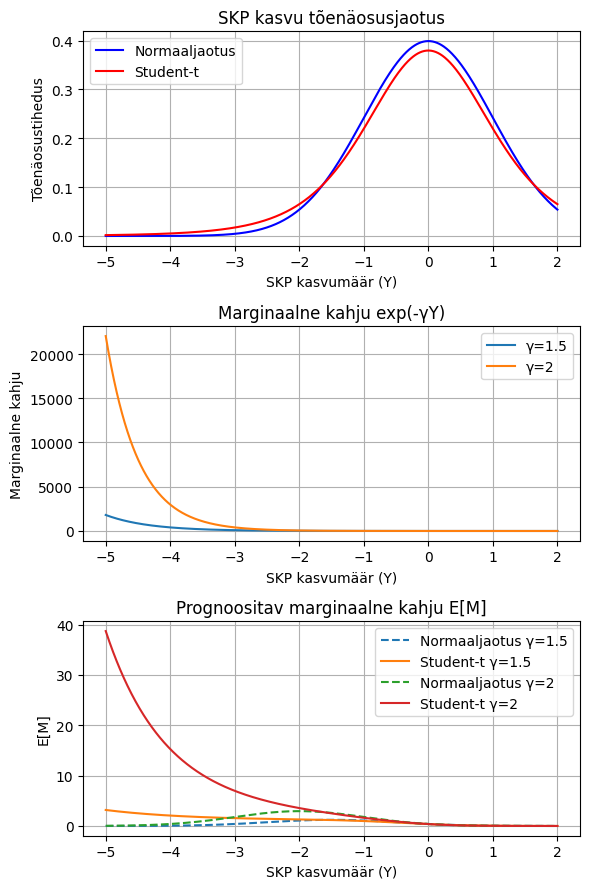

In [3]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(6, 9))

# Plot 1: Distributions
normal = normal_pdf(Y)
student_t = student_t_pdf(Y)
ax1.plot(Y, normal, 'b-', label='Normaaljaotus')
ax1.plot(Y, student_t, 'r-', label='Student-t')
ax1.set_title('SKP kasvu tõenäosusjaotus')
ax1.set_xlabel('SKP kasvumäär (Y)')
ax1.set_ylabel('Tõenäosustihedus')
ax1.legend()
ax1.grid(True)

# Plot 2: Marginal Utility
for gamma in gammas:
    marginal_utility = np.exp(-gamma*Y)
    ax2.plot(Y, marginal_utility, label=f'γ={gamma}')
ax2.set_title('Marginaalne kahju exp(-γY)')
ax2.set_xlabel('SKP kasvumäär (Y)')
ax2.set_ylabel('Marginaalne kahju')
ax2.legend()
ax2.grid(True)

# Plot 3: Expected Marginal Utility
for gamma in gammas:
    EMU_normal = np.exp(-gamma*Y) * normal
    EMU_student = np.exp(-gamma*Y) * student_t
    ax3.plot(Y, EMU_normal, '--', label=f'Normaaljaotus γ={gamma}')
    ax3.plot(Y, EMU_student, '-', label=f'Student-t γ={gamma}')
ax3.set_title('Prognoositav marginaalne kahju E[M]')
ax3.set_xlabel('SKP kasvumäär (Y)')
ax3.set_ylabel('E[M]')
ax3.legend()
ax3.grid(True)

plt.tight_layout()
plt.show()